In [4]:
%matplotlib inline

import pandas as pd
import numpy
from scipy import constants
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox
import matplotlib.gridspec as gridspec

### Read in DFT generated data

In [5]:
neutral_MA_fit = pd.read_csv("./data/MAPbI_neut_CC_fit.csv")
negative_MA_fit = pd.read_csv("./data/MAPbI_neg_CC_fit.csv")
neutral_eh_MA_fit = pd.read_csv("./data/MAPbI_neut_eh_CC_fit.csv")

neutral_MA_DFT = pd.read_csv("./data/MAPbI_neut_CC_DFT.csv")
negative_MA_DFT = pd.read_csv("./data/MAPbI_neg_CC_DFT.csv")
neutral_eh_MA_DFT = pd.read_csv("./data/MAPbI_neut_eh_CC_DFT.csv")
                      
neutral_linear_MA_fit = pd.read_csv("./data/MAPbI_linear_neut_CC_fit.csv")
negative_linear_MA_fit = pd.read_csv("./data/MAPbI_linear_neg_CC_fit.csv")
neutral_eh_linear_MA_fit = pd.read_csv("./data/MAPbI_linear_neut_eh_CC_fit.csv")

neutral_linear_MA_DFT = pd.read_csv("./data/MAPbI_linear_neut_CC_DFT.csv")
negative_linear_MA_DFT = pd.read_csv("./data/MAPbI_linear_neg_CC_DFT.csv")
neutral_eh_linear_MA_DFT = pd.read_csv("./data/MAPbI_linear_neut_eh_CC_DFT.csv")

neutral_MACs_fit = pd.read_csv("./data/MACsPbI_neut_CC_fit.csv")
negative_MACs_fit = pd.read_csv("./data/MACsPbI_neg_CC_fit.csv")
neutral_eh_MACs_fit = pd.read_csv("./data/MACsPbI_neut_eh_CC_fit.csv")

neutral_MACs_DFT = pd.read_csv("./data/MACsPbI_neut_CC_DFT.csv")
negative_MACs_DFT = pd.read_csv("./data/MACsPbI_neg_CC_DFT.csv")
neutral_eh_MACs_DFT = pd.read_csv("./data/MACsPbI_neut_eh_CC_DFT.csv")

cc_e_MACsPbI = pd.read_csv("./data/MACsPbI_cc_e.csv")
cc_h_MACsPbI = pd.read_csv("./data/MACsPbI_cc_h.csv")
cc_e_MAPbI = pd.read_csv("./data/MAPbI_cc_e.csv")
cc_h_MAPbI = pd.read_csv("./data/MAPbI_cc_h.csv")

### Calculate ratio of capture rates

In [6]:
# Calculate capture rates
# From Alkauskas: https://arxiv.org/pdf/1605.05673.pdf
# PhysRevMaterials.4.024602.pdf

cc_np_MACsPbI = (cc_e_MACsPbI["C"]*cc_h_MACsPbI["C"]) / (cc_e_MACsPbI["C"]+cc_h_MACsPbI["C"])
cc_np_MAPbI = (cc_e_MAPbI["C"]*cc_h_MAPbI["C"]) / (cc_e_MAPbI["C"]+cc_h_MAPbI["C"])

electron_concentration = 1e15
dos_vb = 1e18

def dos_vb(temperatures):
    return 2*((2*constants.pi*0.20*constants.electron_mass*constants.Boltzmann*temperatures) / (constants.Planck**2))**(3/2)

# per second per trap density
electron_capture_rate_MAPI = cc_e_MAPbI["C"]*electron_concentration
hole_emission_rate_MAPI = cc_h_MAPbI["C"]*dos_vb(cc_h_MAPbI["T"])*numpy.exp((0.23*constants.electron_volt)/(constants.Boltzmann*cc_h_MAPbI["T"]))
# per second per trap density
electron_capture_rate_MAPCsI = cc_e_MACsPbI["C"]*electron_concentration
hole_emission_rate_MAPCsI = cc_h_MACsPbI["C"]*dos_vb(cc_h_MACsPbI["T"])*numpy.exp((-0.057*constants.electron_volt)/(constants.Boltzmann*cc_h_MACsPbI["T"]))

### Plot data

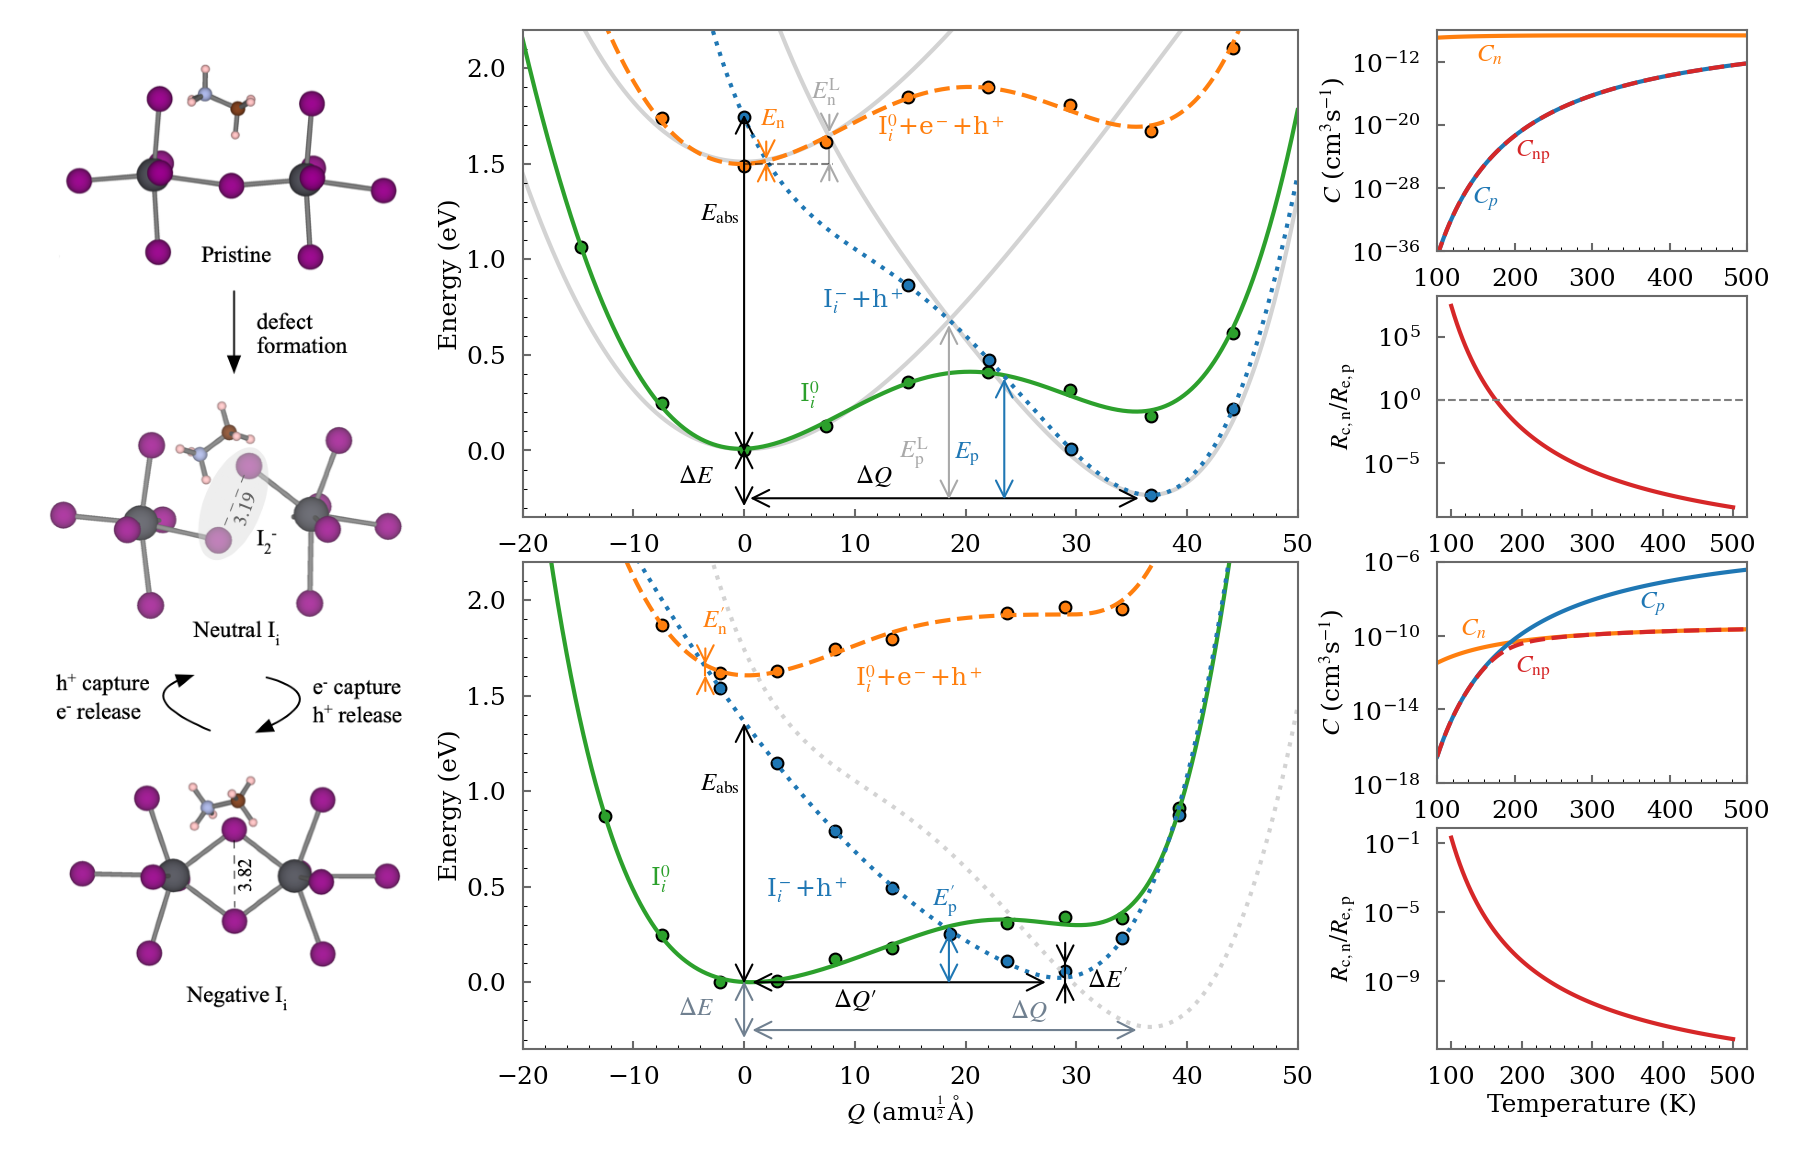

In [7]:
# general plot formatting

width = 7.2
height = 3.6/1.6

ticklabelsize = 6
ticksize = 2
linewidth = 0.5
labelsize = 8
tick_pad = 4
dpi = 150
fontsize=6
markersize=8
labelpad=1.0
dullblack=323034

rc('font', **{'family': 'serif'})
rc('text', usetex=False)
rc('pdf', fonttype=42)
rc('mathtext', fontset='stix')

fig = plt.figure(figsize=(width, height), facecolor="w", dpi=300)

# grid spec for layout
outer = gridspec.GridSpec(4, 3, height_ratios = [1,1,1,1],width_ratios = [0.8,2,0.8]) # hspace

gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[:2,1])
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0,2])
gs2b = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[1,2])
gs3 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[2:,1])
gs4 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[2,2])
gs4b = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[3,2])
gs5 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[:,0])

# set and format axes
axs = numpy.array([[plt.subplot(gs2[0]),plt.subplot(gs1[0]),plt.subplot(gs2[0])],[plt.subplot(gs2[0]),plt.subplot(gs3[0]),plt.subplot(gs4[0])]])
axs4b = plt.subplot(gs4b[0])
axs2b = plt.subplot(gs2b[0],sharex=axs4b)

for axis in axs.flatten():
    axis.tick_params(width=linewidth, size=ticksize,direction='in',color='dimgray')
    axis.tick_params(which='major', size=ticksize, width=linewidth,
               labelsize=ticklabelsize, pad=tick_pad)
    axis.tick_params(which='minor', size=ticksize/2, width=linewidth/2,direction='in')
    for side in ['top', 'bottom', 'left', 'right']:
        axis.spines[side].set_linewidth(linewidth)
        axis.spines[side].set_color("dimgray")
    
for axis in [axs2b,axs4b]:
    axis.tick_params(width=linewidth, size=ticksize,direction='in',color='dimgray')
    axis.tick_params(which='major', size=ticksize, width=linewidth,
               labelsize=ticklabelsize, pad=tick_pad)
    axis.tick_params(which='minor', size=ticksize/2, width=linewidth/2,direction='in')
    for side in ['top', 'bottom', 'left', 'right']:
        axis.spines[side].set_linewidth(linewidth)
        axis.spines[side].set_color("dimgray")
        
# plot data for ratio capture rates (MAPI)        
axs4b.plot(cc_h_MAPbI["T"],electron_capture_rate_MAPCsI/hole_emission_rate_MAPCsI,
          color="tab:red", lw=linewidth*2) 
axs4b.set_yscale('log')
axs4b.set_ylabel(r'$R_\mathrm{c,n} / R_\mathrm{e,p}$',size=fontsize, labelpad=labelpad)
axs4b.set_xlabel('Temperature (K)',size=fontsize, labelpad=labelpad)
axs4b.set_xticks([100,200,300,400,500])
axs4b.minorticks_on()

# plot data for ratio capture rates (MACsPI)  
axs2b.plot(cc_h_MAPbI["T"],electron_capture_rate_MAPI/hole_emission_rate_MAPI,
          color="tab:red", lw=linewidth*2)
axs2b.set_yscale('log')
axs2b.axhline(y=1,lw=linewidth,color='tab:gray',linestyle="--")
axs2b.set_ylabel(r'$R_\mathrm{c,n} / R_\mathrm{e,p}$',size=fontsize, labelpad=labelpad)

# plot MAPI config coordinate data
# plot fitted line
axs[0,1].plot(neutral_MA_fit["Q"], neutral_MA_fit["E"], 
            label=r"$\mathrm{I}_\mathrm{i}^\mathrm{OP}$",
            color='tab:green', markeredgecolor='tab:green', lw=linewidth*2)

axs[0,1].plot(neutral_eh_MA_fit["Q"], neutral_eh_MA_fit["E"], 
            label=r"$\mathrm{I}_\mathrm{i}^\mathrm{OP}+\mathrm{e}+\mathrm{h}$",
            color='tab:orange', markeredgecolor='tab:orange', lw=linewidth*2,linestyle="dashed")

axs[0,1].plot(negative_MA_fit["Q"], negative_MA_fit["E"], 
            label=r"$\mathrm{I}_\mathrm{i}^-+\mathrm{h}$",
            color='tab:blue', markeredgecolor='tab:blue', lw=linewidth*2,linestyle="dotted")

# scatter points for the DFT calculated total energy
axs[0,1].scatter(neutral_MA_DFT["Q"],neutral_MA_DFT["E"],
               color='tab:green',marker="o",s=markersize,edgecolor='black',linewidth=0.5)

axs[0,1].scatter(neutral_eh_MA_DFT["Q"],neutral_eh_MA_DFT["E"],
               color='tab:orange',marker="o",s=markersize,edgecolor='black',linewidth=0.5)

axs[0,1].scatter(negative_MA_DFT["Q"],negative_MA_DFT["E"],
               color='tab:blue',marker="o",s=markersize,edgecolor='black',linewidth=0.5)

# fitted line using the translation-only interpolation
axs[0,1].plot(neutral_linear_MA_fit["Q"]-20.8, neutral_linear_MA_fit["E"]-0.24, 
            label=r"$\mathrm{I}_\mathrm{i}^\mathrm{OP}$",
            color='lightgrey', markeredgecolor='slategrey', lw=linewidth*2,alpha=1,zorder=0)

axs[0,1].plot(neutral_eh_linear_MA_fit["Q"]-20.8, neutral_eh_linear_MA_fit["E"]-0.18, 
            label=r"$\mathrm{I}_\mathrm{i}^\mathrm{OP}+\mathrm{e}+\mathrm{h}$",
            color='lightgrey', markeredgecolor='slategrey', lw=linewidth*2,alpha=1,zorder=0)

axs[0,1].plot(negative_linear_MA_fit["Q"]-20.8, negative_linear_MA_fit["E"]-0.23, 
            label=r"$\mathrm{I}_\mathrm{i}^-+\mathrm{h}$",
            color='lightgrey', markeredgecolor='slategrey', lw=linewidth*2,alpha=1,zorder=0)

# axis formatting
axs[0,1].axis(xmin=-19,xmax=49,ymin=-0.35,ymax=2.2)
axs[0,1].set_xticks([-20,-10,0,10,20,30,40,50])
axs[0,1].minorticks_on()

# annotate plot with arrows and labels
axs[0,1].set_ylabel(r'Energy (eV)',size=fontsize, labelpad=labelpad)
axs[0,1].set_xlabel(r'$Q$ (amu$^\frac{1}{2} \mathrm{\AA}$)',size=fontsize, labelpad=labelpad)

axs[0,1].hlines([1.5],0,8,color='black',linestyle='--',alpha=0.5,linewidth=linewidth)
axs[0,1].annotate(text='', xy=(36.4,-0.25), xytext=(-0.2,-0.25), arrowprops=dict(arrowstyle='<->',lw=linewidth))

axs[0,1].text(x=10,y=-0.17,s=r'$\Delta Q$',size=fontsize)
axs[0,1].annotate(text='', xy=(0,-0.335), xytext=(0,0.05), arrowprops={'arrowstyle':'<->','color':'black', 'lw':linewidth})

axs[0,1].text(x=-6,y=-0.17,s=r'$\Delta E$',size=fontsize)
axs[0,1].annotate(text='', xy=(0,-0.05), xytext=(0,1.8), arrowprops={'arrowstyle':'<->','color':'black', 'lw':linewidth})
axs[0,1].text(x=-4,y=1.2,s=r'$E_\mathrm{abs}$',size=fontsize)

axs[0,1].annotate(text='', xy=(18.5,-0.3), xytext=(18.5,0.7), arrowprops={'arrowstyle':'<->','color':'darkgrey', 'lw':linewidth})
axs[0,1].annotate(text='', xy=(23.5,-0.3), xytext=(23.5,0.42), arrowprops={'arrowstyle':'<->','color':'tab:blue', 'lw':linewidth})

axs[0,1].text(x=19,y=-0.04,s=r'$E_\mathrm{p}$',size=fontsize,color='tab:blue')
axs[0,1].text(x=14,y=-0.04,s=r'$E_\mathrm{p}^\mathrm{L}$',size=fontsize,color='darkgrey')

axs[0,1].annotate(text='', xy=(7.7,1.8), xytext=(7.7,1.62), arrowprops={'arrowstyle':'<-','color':'darkgrey', 'lw':linewidth})
axs[0,1].annotate(text='', xy=(7.7,1.55), xytext=(7.7,1.37), arrowprops={'arrowstyle':'->','color':'darkgrey', 'lw':linewidth})
axs[0,1].vlines(7.7,1.64,1.46,color='darkgrey',lw=linewidth,zorder=0)

axs[0,1].annotate(text='', xy=(2,1.66), xytext=(2,1.48), arrowprops={'arrowstyle':'<-','color':'tab:orange', 'lw':linewidth})
axs[0,1].annotate(text='', xy=(2,1.55), xytext=(2,1.37), arrowprops={'arrowstyle':'->','color':'tab:orange', 'lw':linewidth})
axs[0,1].vlines(2,1.5,1.46,color='tab:orange',lw=linewidth)

axs[0,1].text(x=1.45,y=1.7,s=r'$E_\mathrm{n}$',size=fontsize,color='tab:orange')
axs[0,1].text(x=6,y=1.84,s=r'$E_\mathrm{n}^\mathrm{L}$',size=fontsize,color='darkgrey')

axs[0,1].text(x=5,y=0.25,s=r'I$_i^0$',size=fontsize,color='tab:green')
axs[0,1].text(x=12,y=1.65,s=r'I$_i^0$+e$^-$+h$^+$',size=fontsize,color='tab:orange')
axs[0,1].text(x=7,y=0.75,s=r'I$_i^-$+h$^+$',size=fontsize,color='tab:blue')

# plot MACsPI config coordinate data
# plot fitted lines
axs[1,1].plot(negative_MA_fit["Q"], negative_MA_fit["E"], 
            label=r"$\mathrm{I}_\mathrm{i}^-+\mathrm{h}$",
            color='lightgrey', markeredgecolor='slategrey', lw=linewidth*2,alpha=1,linestyle="dotted")

axs[1,1].plot(neutral_MACs_fit["Q"], neutral_MACs_fit["E"], 
            label=r"$\mathrm{I}_\mathrm{i}^\mathrm{OP}$",
            color='tab:green', markeredgecolor='tab:green', lw=linewidth*2)

axs[1,1].plot(neutral_eh_MACs_fit["Q"], neutral_eh_MACs_fit["E"], 
            label=r"$\mathrm{I}_\mathrm{i}^\mathrm{OP}+\mathrm{e}+\mathrm{h}$",
            color='tab:orange', markeredgecolor='tab:orange', lw=linewidth*2,linestyle="dashed")

axs[1,1].plot(negative_MACs_fit["Q"], negative_MACs_fit["E"], 
            label=r"$\mathrm{I}_\mathrm{i}^-+\mathrm{h}$",
            color='tab:blue', markeredgecolor='tab:blue', lw=linewidth*2,linestyle="dotted")

# scatter points for the DFT calculated total energy
axs[1,1].scatter(neutral_MACs_DFT["Q"],neutral_MACs_DFT["E"],
               color='tab:green',marker="o",s=markersize,edgecolor='black',linewidth=0.5)

axs[1,1].scatter(neutral_eh_MACs_DFT["Q"],neutral_eh_MACs_DFT["E"],
               color='tab:orange',marker="o",s=markersize,edgecolor='black',linewidth=0.5)

axs[1,1].scatter(negative_MACs_DFT["Q"],negative_MACs_DFT["E"],
               color='tab:blue',marker="o",s=markersize,edgecolor='black',linewidth=0.5)

# axis formatting
axs[1,1].axis(xmin=-19,xmax=49,ymin=-0.35,ymax=2.2)
axs[1,1].set_ylabel(r'Energy (eV)',size=fontsize, labelpad=labelpad)
axs[1,1].set_xlabel(r'$Q$ (amu$^\frac{1}{2} \mathrm{\AA}$)',size=fontsize, labelpad=labelpad)
axs[1,1].set_xticks([-20,-10,0,10,20,30,40,50])
axs[1,1].minorticks_on()

# annotate with arrows and labels

axs[1,1].annotate(text='', xy=(36.2,-0.25), xytext=(0,-0.25), arrowprops=dict(arrowstyle='<->',lw=linewidth,color='slategrey'))
axs[1,1].text(x=24,y=-0.185,s=r'$\Delta Q$',size=fontsize,color='slategrey')

axs[1,1].annotate(text='', xy=(28,0), xytext=(0,0), arrowprops=dict(arrowstyle='<->',lw=linewidth))
axs[1,1].text(x=8,y=-0.13,s=r'$\Delta Q\prime$',size=fontsize)

axs[1,1].annotate(text='', xy=(0,-0.335), xytext=(0,0.05), arrowprops={'arrowstyle':'<->','color':'slategray', 'lw':linewidth})
axs[1,1].text(x=-6,y=-0.17,s=r'$\Delta E$',size=fontsize, color='slategray')

axs[1,1].annotate(text='', xy=(0,-0.05), xytext=(0,1.4), arrowprops={'arrowstyle':'<->','color':'black', 'lw':linewidth})
axs[1,1].text(x=-4,y=1.0,s=r'$E_\mathrm{abs}$',size=fontsize,color='black')

axs[1,1].annotate(text='', xy=(18.5,-0.05), xytext=(18.5,0.30), arrowprops={'arrowstyle':'<->','color':'tab:blue', 'lw':linewidth})
axs[1,1].text(x=17,y=0.4,s=r'$E^{\prime}_\mathrm{p}$',size=fontsize,color='tab:blue')

axs[1,1].annotate(text='', xy=(29,0.25), xytext=(29,0.05), arrowprops={'arrowstyle':'<-','color':'black', 'lw':linewidth})
axs[1,1].annotate(text='', xy=(29,0.05), xytext=(29,-0.15), arrowprops={'arrowstyle':'->','color':'black', 'lw':linewidth})
axs[1,1].vlines(29,-0.05,0.15,lw=linewidth,color='black')
axs[1,1].text(x=31,y=-0.03,s=r'$\Delta E^\prime$',size=fontsize,color='black')

axs[1,1].annotate(text='', xy=(-3.5,1.79), xytext=(-3.5,1.62), arrowprops={'arrowstyle':'<-','color':'tab:orange', 'lw':linewidth})
axs[1,1].annotate(text='', xy=(-3.5,1.65), xytext=(-3.5,1.48), arrowprops={'arrowstyle':'->','color':'tab:orange', 'lw':linewidth})
axs[1,1].vlines(-3.5,1.6,1.7,color='tab:orange',lw=linewidth)
axs[1,1].text(x=-3.8,y=1.85,s=r'$E^{\prime}_\mathrm{n}$',size=fontsize,color='tab:orange')

axs[1,1].text(x=-8.5,y=0.5,s=r'I$_i^0$',size=fontsize,color='tab:green')
axs[1,1].text(x=10,y=1.55,s=r'I$_i^0$+e$^-$+h$^+$',size=fontsize,color='tab:orange')
axs[1,1].text(x=2,y=0.45,s=r'I$_i^-$+h$^+$',size=fontsize,color='tab:blue')

# plot carrier capture coefficient data 
axs[1,2].plot(cc_e_MAPbI["T"],cc_e_MACsPbI["C"],color='tab:orange', lw=linewidth*2)
axs[1,2].plot(cc_e_MAPbI["T"],cc_h_MACsPbI["C"],color='tab:blue', lw=linewidth*2)
axs[1,2].plot(cc_e_MAPbI["T"],cc_np_MACsPbI, lw=linewidth*2,color='tab:red',linestyle="dashed")

axs[0,2].plot(cc_e_MAPbI["T"],cc_e_MAPbI["C"],color='tab:orange', lw=linewidth*2)
axs[0,2].plot(cc_e_MAPbI["T"],cc_h_MAPbI["C"],color='tab:blue', lw=linewidth*2)
axs[0,2].plot(cc_e_MAPbI["T"],cc_np_MAPbI, lw=linewidth*2,color='tab:red',linestyle="dashed")

axs[0,2].set_yscale('log')
axs[1,2].set_yscale('log')

# format axes
axs[1,2].axis(xmin=100,xmax=500,ymin=1E-18,ymax=1E-6)
axs[0,2].axis(xmin=100,xmax=500,ymin=1E-36,ymax=1E-8)

axs[1,2].set_ylabel(r'$C$ (cm$^3$s$^{-1}$)',size=fontsize, labelpad=labelpad)
axs[0,2].set_ylabel(r'$C$ (cm$^3$s$^{-1}$)',size=fontsize, labelpad=labelpad)

# annotate 
axs[1,2].text(x=130,y=1E-10,s=r'$C_n$',size=fontsize,color="tab:orange")
axs[1,2].text(x=360,y=3E-9,s=r'$C_p$',size=fontsize,color="tab:blue")
axs[1,2].text(x=200,y=1E-12,s=r'$C_\mathrm{np}$',size=fontsize,color="tab:red")

axs[0,2].text(x=145,y=1E-30,s=r'$C_p$',size=fontsize,color="tab:blue")
axs[0,2].text(x=150,y=1E-12,s=r'$C_n$',size=fontsize,color="tab:orange")
axs[0,2].text(x=200,y=1E-24,s=r'$C_\mathrm{np}$',size=fontsize,color="tab:red")

axs[1,2].minorticks_on()
axs[0,2].minorticks_on()

# make subplot for holding schematic 
ax5 = plt.subplot(gs5[0])
ax5.get_xaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)
# remove borders
for axis in ['top', 'bottom', 'left', 'right']:
    ax5.spines[axis].set_linewidth(0)
    ax5.spines[axis].set_color("white")

# add structure schematic
im = image.imread('defect_geom_molecule.png')
imagebox = OffsetImage(im,zoom=0.22,zorder=0)
ab = AnchoredOffsetbox(loc='center', child=imagebox, frameon=False)
ax5.add_artist(ab)

# final adjustments to spacing
plt.subplots_adjust(wspace=0.3, hspace=None)
fig.set_size_inches(7.2,(7.2)/1.6,forward=True)
